In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Fish_data = pd.read_csv('Fish.csv')

In [3]:
Fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
Fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
print(Fish_data.Species.unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [6]:
print(Fish_data.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [7]:
sns.set_style('darkgrid')

<AxesSubplot:>

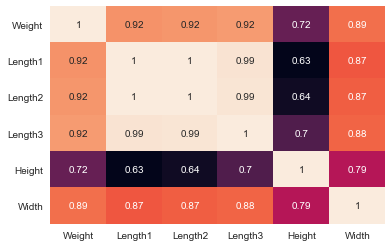

In [8]:
sns.heatmap(Fish_data.corr(), annot=True,cbar=False)

<AxesSubplot:xlabel='Species', ylabel='count'>

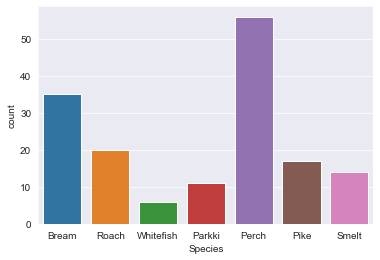

In [9]:
sns.countplot(x=Fish_data['Species'])

Text(0, 0.5, 'Lengths')

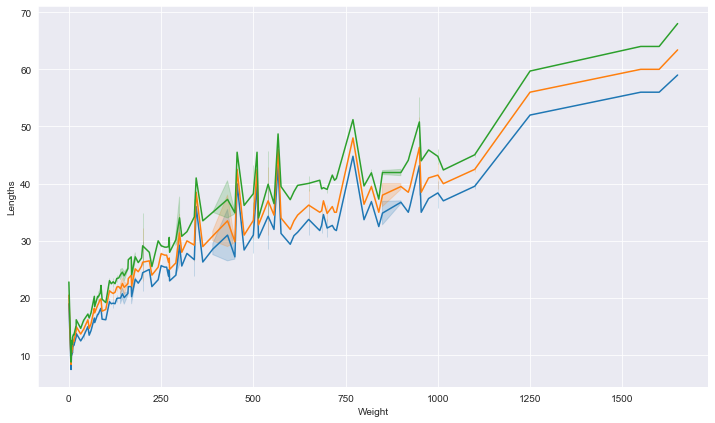

In [10]:
plt.figure(figsize=(12,7))
sns.lineplot(x=Fish_data['Weight'],y=Fish_data['Length1'])
sns.lineplot(x=Fish_data['Weight'],y=Fish_data['Length2'])
sns.lineplot(x=Fish_data['Weight'],y=Fish_data['Length3'])
plt.ylabel('Lengths')

<AxesSubplot:xlabel='Width', ylabel='Height'>

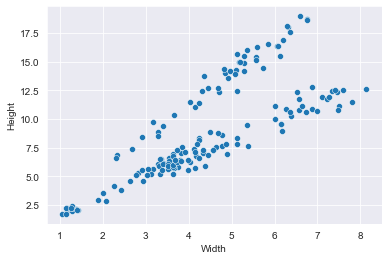

In [11]:
sns.scatterplot(x = Fish_data['Width'],y=Fish_data['Height'])

In [12]:
Fish_data.groupby(['Species']).agg({'Weight':['mean','std','count','max','min']})

Weight                                 
                 mean         std count     max    min
Species                                               
Bream      617.828571  209.205709    35  1000.0  242.0
Parkki     154.818182   78.755086    11   300.0   55.0
Perch      382.239286  347.617717    56  1100.0    5.9
Pike       718.705882  494.140765    17  1650.0  200.0
Roach      152.050000   88.828916    20   390.0    0.0
Smelt       11.178571    4.131526    14    19.9    6.7
Whitefish  531.000000  309.602972     6  1000.0  270.0

In [13]:
Fish_data3 = Fish_data[Fish_data['Species'].isin(['Bream','Perch','Whitefish'])]

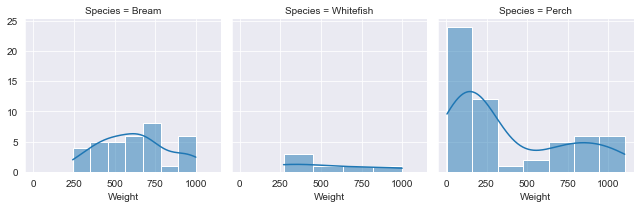

In [14]:
d = sns.FacetGrid(data = Fish_data3,col='Species')
d.map(sns.histplot,'Weight',kde=True)

In [15]:
Fish_data[Fish_data['Species'].isin(['Whitefish'])]

,Species,Weight,Length1,Length2,Length3,Height,Width
55,Whitefish,270.0,23.6,26.0,28.7,8.3804,4.2476
56,Whitefish,270.0,24.1,26.5,29.3,8.1454,4.2485
57,Whitefish,306.0,25.6,28.0,30.8,8.7780,4.6816
58,Whitefish,540.0,28.5,31.0,34.0,10.7440,6.5620
59,Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736
60,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250


In [16]:
Fish_data3[Fish_data3['Weight']>250]

,Species,Weight,Length1,Length2,Length3,Height,Width
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
...,...,...,...,...,...,...,...
123,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
124,Perch,1000.0,39.8,43.0,45.2,11.9328,7.2772
125,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
126,Perch,1000.0,40.2,43.5,46.0,12.6040,8.1420


In [17]:
Fish_data.groupby(['Species']).mean()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
Pike,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382
Roach,152.050000,20.645000,22.275000,24.970000,6.694795,3.657850
Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050


In [18]:
Fish_data.groupby(['Species']).agg({'Weight':['count','max','min']})

Weight               
           count     max    min
Species                        
Bream         35  1000.0  242.0
Parkki        11   300.0   55.0
Perch         56  1100.0    5.9
Pike          17  1650.0  200.0
Roach         20   390.0    0.0
Smelt         14    19.9    6.7
Whitefish      6  1000.0  270.0

In [19]:
Fish_data[Fish_data['Weight']<=0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [20]:
Fish_data[Fish_data['Species']=='Roach']

,Species,Weight,Length1,Length2,Length3,Height,Width
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943
43,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
44,Roach,145.0,20.5,22.0,24.3,6.6339,3.5478


In [21]:
Fish_data = Fish_data.drop([40],axis=0);

In [22]:
Fish_data.loc[39:41,:]

,Species,Weight,Length1,Length2,Length3,Height,Width
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957


In [24]:
#Encoding Categorical variable
Fish_data_dummy = pd.get_dummies(Fish_data['Species'],drop_first=True);

In [25]:
Fish_data = Fish_data.drop('Species',axis=1)

In [26]:
Fish_data_final = pd.concat([Fish_data,Fish_data_dummy],axis=1)

In [27]:
Fish_data_final.head()

,Weight,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [29]:
#Train Test Split,Formatting data
x = Fish_data_final.drop('Weight',axis=1)
y = Fish_data_final['Weight'];

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(x_train)

StandardScaler()

In [34]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
#build model
from sklearn.linear_model import LinearRegression, ElasticNet

In [36]:
linear_model = LinearRegression()

In [37]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred = linear_model.predict(x_test)

In [40]:
linear_model.coef_

array([-3.93845689e+02,  6.12346915e+02,  2.33388364e+02, -4.83905139e+01,
        5.56535028e+00,  2.85088244e+01, -4.57942023e-01, -1.07157452e+02,
       -6.98143721e+00,  6.81780850e+01,  7.92120446e+00])

In [41]:
#understad predictions using metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error;

In [42]:
Mae = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,y_pred)

In [56]:
print(Mae)
print(MSE)
print(RMSE)
print(r2)

68.69758140791986
8524.898581665491
92.33037735039044
0.9306997867463995
